# Analisa Sentimen Dari Media Sosial Twitter Tentang Agresivitas Kepada Para Pejabat Indonesia Di Tahun 2019

## 1. Import Library & Load Dataset Dari Local Device

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data_2019 = pd.read_excel("Data Tahun 2019.xlsx")
data_2019.head()

,date,content,label
0,2019-12-26 16:07:17+00:00,@Quvvatt @amelscat @FirzaHusain @jokowi Si kad...,positif
1,2019-12-26 13:16:30+00:00,@NelkaNs Siapa juga yg seudzon dari dulu gue p...,positif
2,2019-12-26 10:13:08+00:00,@sigitwid @psi_id oi PSI...instropeksi....part...,negatif
3,2019-12-26 03:08:02+00:00,@firaun_id @aniesbaswedan @opposite6890 @mas__...,positif
4,2019-12-26 03:03:46+00:00,@geloraco Yang sering asal ngomong dan keliata...,positif


In [3]:
# Mengecek tipe data dan juga apakah di dalam DataFrame "data_2019" memiliki nilai NaN/tidak
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1800 non-null   object
 1   content  1800 non-null   object
 2   label    1800 non-null   object
dtypes: object(3)
memory usage: 42.3+ KB


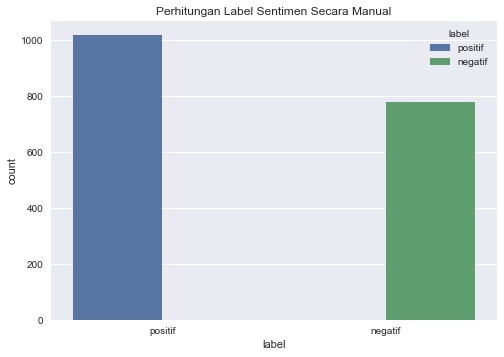

<Figure size 720x720 with 0 Axes>

In [4]:
# Melakukan visualisasi untuk kolom "label"

plt.style.use("seaborn")
plt.title("Perhitungan Label Sentimen Secara Manual")
sns.countplot(x="label", hue="label", data=data_2019)
plt.figure(figsize=(10, 10))
plt.show()

In [5]:
# Menghitung sekaligus mengurutkan jumlah label terbanyak berdasarkan tweet
jumlah_content = data_2019.groupby("label").count()["content"].reset_index().sort_values(by="content", ascending=False)
jumlah_content.style.background_gradient(cmap="autumn")

,label,content
1,positif,1019
0,negatif,781


Dapat dilihat dari perhitungan diatas, dari 1800 jumlah data netizen twitter di tahun 2019 ketika melakukan tweet tentang topik para pejabat di Indonesia mendapatkan label positif yang sangat tinggi daripada label negatif yang memiliki jumlah sentimen sebanyak 1019 tweet sedangkan label negatif memiliki jumlah sentimen sebanyak 781.

## 2. Text Preprocessing (Cleansing, Case Folding, Tokenizing, Stopwords & Stemming)

### Cleansing Teks

In [6]:
# Menghilangkan dari kalimat-kalimat, simbol-simbol, emoticon yang tidak dibutuhkan selama pengujian pada kolom content
def bersih_text(text):
    text = re.sub(r'[^a-zA-z0-9]',' ', str(text))
    text = re.sub(r'\b\w{1,2}\b','', text)
    text = re.sub(r'\s\s+',' ', text)
    text = re.sub(r'https?:\/\/\S+', '', text)  
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    return text

data_2019["content"] = data_2019["content"].apply(bersih_text)

data_2019.head()

,date,content,label
0,2019-12-26 16:07:17+00:00,Quvvatt amelscat FirzaHusain jokowi kadrun sp...,positif
1,2019-12-26 13:16:30+00:00,NelkaNs Siapa juga seudzon dari dulu gue pend...,positif
2,2019-12-26 10:13:08+00:00,sigitwid psi id PSI instropeksi partai penjil...,negatif
3,2019-12-26 03:08:02+00:00,firaun id aniesbaswedan opposite6890 mas piy...,positif
4,2019-12-26 03:03:46+00:00,geloraco Yang sering asal ngomong dan keliata...,positif


In [7]:
# Menghapus spasi pada kolom "label"
data_2019.label = list(map(lambda x: x.strip(), data_2019.label))
data_2019.head()

,date,content,label
0,2019-12-26 16:07:17+00:00,Quvvatt amelscat FirzaHusain jokowi kadrun sp...,positif
1,2019-12-26 13:16:30+00:00,NelkaNs Siapa juga seudzon dari dulu gue pend...,positif
2,2019-12-26 10:13:08+00:00,sigitwid psi id PSI instropeksi partai penjil...,negatif
3,2019-12-26 03:08:02+00:00,firaun id aniesbaswedan opposite6890 mas piy...,positif
4,2019-12-26 03:03:46+00:00,geloraco Yang sering asal ngomong dan keliata...,positif


Setelah melakukan proses cleansing teks yaitu menghapus beberapa simbol/karakter-karakter yang tidak dipentingkan dalam kolom content tweet, langkah selanjutnya adalah case folding. Case folding merupakan sebuah tahapan untuk mengubah huruf-huruf kapital menjadi huruf-huruf kecil.

### Case Folding

In [8]:
# Mengubah ukuran setiap kalimat yang ada di kolom "content" menjadi huruf kecil
data_2019["content"] = data_2019["content"].str.lower()

data_2019.head()

,date,content,label
0,2019-12-26 16:07:17+00:00,quvvatt amelscat firzahusain jokowi kadrun sp...,positif
1,2019-12-26 13:16:30+00:00,nelkans siapa juga seudzon dari dulu gue pend...,positif
2,2019-12-26 10:13:08+00:00,sigitwid psi id psi instropeksi partai penjil...,negatif
3,2019-12-26 03:08:02+00:00,firaun id aniesbaswedan opposite6890 mas piy...,positif
4,2019-12-26 03:03:46+00:00,geloraco yang sering asal ngomong dan keliata...,positif


Setelah melakukan proses case folding, langkah selanjutnya adalah tokenizing/tokenisasi. Tahap tokenizing merupakan tahap pemotongan teks ke dalam satuan kata.

### Tokenizing

In [9]:
# Melakukan Tahapan Tokenisasi. 
# Tokenisasi adalah tahapan prepocessing data yang digunakan untuk membagi kalimat menjadi perkata
def tokennization(text):
    return word_tokenize(text)

data_2019["content_tokenizing"] = data_2019["content"].apply(tokennization)
data_2019.head()

,date,content,label,content_tokenizing
0,2019-12-26 16:07:17+00:00,quvvatt amelscat firzahusain jokowi kadrun sp...,positif,"[quvvatt, amelscat, firzahusain, jokowi, kadru..."
1,2019-12-26 13:16:30+00:00,nelkans siapa juga seudzon dari dulu gue pend...,positif,"[nelkans, siapa, juga, seudzon, dari, dulu, gu..."
2,2019-12-26 10:13:08+00:00,sigitwid psi id psi instropeksi partai penjil...,negatif,"[sigitwid, psi, id, psi, instropeksi, partai, ..."
3,2019-12-26 03:08:02+00:00,firaun id aniesbaswedan opposite6890 mas piy...,positif,"[firaun, id, aniesbaswedan, opposite6890, mas,..."
4,2019-12-26 03:03:46+00:00,geloraco yang sering asal ngomong dan keliata...,positif,"[geloraco, yang, sering, asal, ngomong, dan, k..."


Setelah melakukan tahapan tokenisasi, selanjutnya saya akan melakukan proses filtering (stowords). Proses stopwords ini merupakan tahapan mengambil kata-kata dari tahapan tokenisasi. Stopword merupakan sebuah tahapan yang dimana bertujuan untuk membuang kata-kata yang tidak deskriptif dalam melakukan pendekatan bag-of-words.

### Stopwords

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Proses stopwords saya lakukan dengan mengambil nilai-nilai yang ada diatas yang sudah ditentukan oleh library Sastrawi. Kata-kata diatas boleh digunakan secara keseluruhan/diambil hanya beberapa saja.

In [11]:
# Proses Filtering dari kolom "content_tokenizing"
nltk.download("stopwords")
from nltk.corpus import stopwords

list_delete = ["yang", "untuk", "pada", "ke", "antara", "dua", "ia", "seperti", "antara", "dia", "seperti", "jika",
               "tidak", "oleh", "saat", "harus", "sementara", "mereka", "sudah", "terhadap", "sehingga",
               "secara", "agar", "lain", "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada",
               "sekitar", "serta", "di", "dari", "telah", "sebagai", "masih", 'setidaknya', "sesuatu", "pasti", 
               "saja", "toh", "ya", "walau", "hal", "bahwa", "atau", "hanya", "ada", "mereka", "agar", "lain", 
               "anda", "begitu", "yaitu", "yakni", "itulah", "demi", "dimana", "pula", "sambil", "sebelum", 
               "sesudah", "guna", "ia", "dengan", "https", "supaya", "kah", "pun", "sampai", "seraya", "seterusnya", 
               "tanpa", "agak", "boleh", "dapat", "dsb", "dst", "nggak", "mari", "nanti", "melainkan", "oh", "ok",
               "sedangkan", "selagi", "seharusnya", "sebetulnya", "setiap", "apakah", "kecuali", "sebab", "selain"]

list_stopwords = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Mendeklarasikan fungsi untuk list_stopwords
def stopword(text):
    return [word for word in text if word not in list_stopwords]

data_2019["content_stopwords"] = data_2019["content_tokenizing"].apply(stopword)

In [13]:
# Mendeklarasikan fungsi untuk list_delete
def stopwords_removal(text):
    return [word for word in text if word not in list_delete]

data_2019["content_stopwords"] = data_2019["content_stopwords"].apply(stopwords_removal)
data_2019.head()

,date,content,label,content_tokenizing,content_stopwords
0,2019-12-26 16:07:17+00:00,quvvatt amelscat firzahusain jokowi kadrun sp...,positif,"[quvvatt, amelscat, firzahusain, jokowi, kadru...","[quvvatt, amelscat, firzahusain, jokowi, kadru..."
1,2019-12-26 13:16:30+00:00,nelkans siapa juga seudzon dari dulu gue pend...,positif,"[nelkans, siapa, juga, seudzon, dari, dulu, gu...","[nelkans, seudzon, gue, pendukung, anies, tuh,..."
2,2019-12-26 10:13:08+00:00,sigitwid psi id psi instropeksi partai penjil...,negatif,"[sigitwid, psi, id, psi, instropeksi, partai, ...","[sigitwid, psi, id, psi, instropeksi, partai, ..."
3,2019-12-26 03:08:02+00:00,firaun id aniesbaswedan opposite6890 mas piy...,positif,"[firaun, id, aniesbaswedan, opposite6890, mas,...","[firaun, id, aniesbaswedan, opposite6890, mas,..."
4,2019-12-26 03:03:46+00:00,geloraco yang sering asal ngomong dan keliata...,positif,"[geloraco, yang, sering, asal, ngomong, dan, k...","[geloraco, ngomong, keliatan, bego, anies, bas..."


Tahapan terakhir dalam text processing adalah proses stemming. Teknik Stemming merupakan sebuah tahapan kegiatan text preprocessing untuk memperkecil jumlah indeks yang berbeda dari suatu data dan juga untuk melakukan pengelompokan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula.

### Stemming

In [14]:
# Proses Stemming dibantu dengan bantuan swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter # Swifter berfungsi untuk mempercepat froses stemming pada Dataframe dengan menjalankan task secara parallel

# Membuat Stemmer dari sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi stemming
def stemming(text):
    return stemmer.stem(text)

term_dict = {}

# Menghitung ada berapa kata/words di dalam kolom "content_stopwords"
for document in data_2019["content_stopwords"]:
    for text in document:
        if text not in term_dict:
            term_dict[text] = " "
            
print(len(term_dict))
print("------------------------")

# Menampilkan isi kata/words yang telah dilakukan proses stemming
for text in term_dict:
    term_dict[text] = stemming(text)
    print(text,":" ,term_dict[text])
    
print(term_dict)
print("------------------------")

# Membuat fungsi baru untuk proses stemming
def stemming_word(document):
    return [term_dict[text] for text in document]

data_2019["content_stemming"] = data_2019["content_stopwords"].swifter.apply(stemming_word)

8242
------------------------
quvvatt : quvvatt
amelscat : amelscat
firzahusain : firzahusain
jokowi : jokowi
kadrun : kadrun
spesialis : spesialis
penjilat : jilat
belagak : bagak
bego : bego
foto2 : foto2
matanya : mata
buta : buta
dgn : dgn
kondisi : kondisi
jkt : jkt
hancur : hancur
berantakan : beranta
ajo : ajo
tolol : tolol
ngeles : ngeles
hny : hny
menyalahkan : salah
foto : foto
bilang : bilang
anies : anies
spy : spy
beresin : resin
jamban : jamban
gak : gak
ngurus : ngurus
balap : balap
mobil : mobil
kaum : kaum
borju : borju
xkvq3iecij : xkvq3iecij
nelkans : nelkans
seudzon : seudzon
gue : gue
pendukung : dukung
tuh : tuh
luh : luh
knapa : knapa
ngegas : ngegas
krjaan : krjaan
yah : yah
sigitwid : sigitwid
psi : psi
id : id
instropeksi : instropeksi
partai : partai
koar2 : koar2
jls : jls
menun : nun
jukkn : jukkn
sejuta : juta
kali : kali
bully : bully
juta : juta
bela : bela
nya : nya
krn : krn
kmu : kmu
robot : robot
rezim : rezim
otak : otak
firaun : firaun
aniesbasweda

komen : komen
sesuai : sesuai
topik : topik
sdh : sdh
selesai : selesai
dibahas : bahas
mencabutnya : cabut
kau : kau
komentari : komentar
yradianto : yradianto
lebar : lebar
daun : daun
talas : talas
menaikkan : naik
talam : talam
bener : bener
gakbener : gakbener
kota : kota
terendam : rendam
4niescucitangan : 4niescucitangan
adykren : adykren
sanjaya35120419 : sanjaya35120419
kekuasaan : kuasa
tanggung : tanggung
hak : hak
utk : utk
pemimpin : pimpin
menyetujui : tuju
tdk : tdk
pastinya : pasti
resiko : resiko
acc : acc
nama : nama
sendirilah : sendiri
oke : oke
k7daus : k7daus
bantanihery : bantanihery
fariedridha : fariedridha
sandalista1789 : sandalista1789
tol : tol
hsl : hsl
ngutang : ngutang
hbs : hbs
dijual : jual
tolnya : tol
gunting : gunting
pita : pita
fansboynya : fansboynya
nyalahin : nyalahin
contoh : contoh
becakayu : becakayu
kek : kek
bikin : bikin
nkri : nkri
gaduh : gaduh
sabar : sabar
khan : khan
pilihan : pilih
hehehe : hehehe
2pecnppgf9 : 2pecnppgf9
pauldj : pa

2014 : 2014
dipiara : piara
kambing : kambing
noh : noh
qurban : qurban
abdul : abdul
ar638 : ar638
persija : persija
polhukamri : polhukamri
kejaksaanri : kejaksaanri
kelaparan : lapar
marah : marah
disaat : saat
kenyang : kenyang
pasukan : pasu
nasi : nasi
bungkus : bungkus
matamu : mata
liat : liat
bnyak : bnyak
diperlihara : diperlihara
tolakbigotri : tolakbigotri
billray2019 : billray2019
djanchoek : djanchoek
aryprasetyo85 : aryprasetyo85
alvaroelee : alvaroelee
masukan : masuk
tanah : tanah
alirkan : alir
vivacoid : vivacoid
ity : ity
sebelm : sebelm
ajamereka : ajamereka
alvinlie21 : alvinlie21
kesopirnya : sopir
knp : knp
masuk : masuk
lobang : lobang
oren : oren
dipasang : pasang
bkn : bkn
kpd : kpd
mengurus : urus
270 : 270
penduduk : duduk
luas : luas
904 : 904
569 : 569
km2 : km2
dibantu : bantu
659 : 659
300 : 300
000 : 000
kpl : kpl
dinas : dinas
ditambah : tambah
tgupp : tgupp
amburadul : amburadul
disalahhin : disalahhin
seriusan : serius
mendingan : mending
piknik : p

permasalahin : permasalahin
menolak : tolak
haikal : haikal
hassan : hassan
hianati : hianati
hukumdan : hukumdan
andai : andai
beringas : beringas
kesetanan : setan
riva : riva
bond : bond
rudy42551620 : rudy42551620
ukhtizahra : ukhtizahra
02 : 02
gerindra : gerindra
aduhhh : aduhhh
koh : koh
dech : dech
kena : kena
hajar : hajar
ehhh : ehhh
bpknya : bpknya
repost : repost
aah : aah
tergelincir : gelincir
mulutnya : mulut
menyerang : serang
caci : caci
maki : maki
ernestprakasanyebarhoax : ernestprakasanyebarhoax
ernestprakasa : ernestprakasa
grace : grace
nat : nat
wpradhika : wpradhika
aje : aje
caper : caper
ulang : ulang
reply : reply
apapun : apa
profesi : profesi
ernest : ernest
ngritik : ngritik
dianggap : anggap
pdip : pdip
nanya : nanya
ngelarang : ngelarang
simple : simple
indonesiar4y4 : indonesiar4y4
recoignitionwal : recoignitionwal
ngelem : ngelem
kyk : kyk
biaya : biaya
berpikir : pikir
kayu : kayu
pembagunan : pembagunan
berjalan : jalan
merusak : rusak
menebang : teb

marquez : marquez
radja : radja
dergrosenjoe135 : dergrosenjoe135
ute58221550 : ute58221550
r036 : r036
r : r
hate : hate
raemma305 : raemma305
natalieanggi112 : natalieanggi112
dya : dya
11677 : 11677
arjunafreddy : arjunafreddy
zulfika35354359 : zulfika35354359
ki : ki
selo : selo
rafaadhitya : rafaadhitya
eddywiyose : eddywiyose
ciwamp : ciwamp
sukmanatanegar1 : sukmanatanegar1
andyjuliyanto22 : andyjuliyanto22
irfanprtm45 : irfanprtm45
melinda : melinda
liin : liin
waelzuhri : waelzuhri
buhahaha : buhahaha
tolo : tolo
ustadnya : ustad
bengak : bengak
begok : begok
pengikutnya : ikut
dmana2 : dmana2
guru : guru
dijamin : jamin
muridnya : murid
pejbt : pejbt
nguvapin : nguvapin
die : die
apa2 : apa2
dalil : dalil
soni : soni
kmana : kmana
suara : suara
sngaja : sngaja
sebar : sebar
hoax : hoax
bnyk : bnyk
boleh2 : boleh2
hallah : hal
ditanggepin : ditanggepin
tujuan : tuju
koreksiny : koreksiny
kalangan : kalang
awam : awam
prcaya : prcaya
korban : korban
digambarkan : gambar
taliban

igl8atqx2q : igl8atqx2q
wahhabicc : wahhabicc
jabar : jabar
babi : babi
ape : ape
kate : kate
berani : berani
menista : nista
resikonya : resiko
didemo : demo
berjulid2 : berjulid2
prajurit : prajurit
jenderalnya : jenderal
konyol : konyol
4niescintacolosseum : 4niescintacolosseum
lepas : lepas
diskotek : diskotek
colosseum : colosseum
xkzd83l5ez : xkzd83l5ez
iwangenduut : iwangenduut
mcm : mcm
town : town
planner : planner
luluskan : lulus
plan : plan
paking : paking
undi : undi
banggang : banggang
nak : nak
mampos : mampos
jenius : jenius
pintar : pintar
terobosan : terobos
dicopot : copot
berpikiran : pikir
bantu : bantu
pal : pal
oenghargaan : oenghargaan
abreg : abreg
ngoceh : ngoceh
trusssss : trusssss
time : time
line : line
jasa : jasa
terealisasi : realisasi
andy : andy
budiman : budiman
planga : planga
plongo : plongo
lucunya : lucu
melulu : melulu
kaget : kaget
bareng : bareng
legislatif : legislatif
dipikir : pikir
masyarakatnya : masyarakat
lekpjkqpwi : lekpjkqpwi
fedup258

yusuf91553749 : yusuf91553749
frida : frida
rahardjo : rahardjo
membodoh2i : membodoh2i
vivanewscom : vivanewscom
bwh : bwh
goblokin : goblokin
diadakan : ada
fortaleza : fortaleza
brazil : brazil
menaikan : naik
pamor : pamor
parameter : parameter
mengaburkan : abur
dipatahkan : patah
premis : premis
blng : blng
ubzkp3b1js : ubzkp3b1js
eguhw : eguhw
nyuruh : nyuruh
dikasih : kasih
sertifikat : sertifikat
kontribusi : kontribusi
dihilangkan : hilang
tangkap : tangkap
berat : berat
diongkos : ongkos
kecewa : kecewa
habitat : habitat
ngaji : ngaji
pakarena1971 : pakarena1971
lokbin103 : lokbin103
9anen : 9anen
k0lak : k0lak
aniesnya : aniesnya
jakartaa : jakartaa
jakartaaaa : jakartaaaa
malih : malih
komplain : komplain
alex : alex
hunter146 : hunter146
pengarang : arang
puisi : puisi
dedonc : dedonc
cuitanland : cuitanland
ajudakusumah : ajudakusumah
ryugie : ryugie
nufus : nufus
82 : 82
jongosnya : jongos
itusemanisaku : itusemanisaku
postur : postur
budgetting : budgetting
usulkan : u

belingsatan : belingsat
ngelucu : ngelucu
cian : cian
wawasan : wawas
dlu : dlu
malu2 : malu2
cegog : cegog
ramai2 : ramai2
nyeruduk : nyeruduk
mentimoen : mentimoen
aryprasetyo : aryprasetyo
85 : 85
jokowicintafpi : jokowicintafpi
rasis : ras
kerendem : kerendem
rosiade : rosiade
linknya : linknya
komplit : komplit
sapthadiena10 : sapthadiena10
ai23781544 : ai23781544
my : my
lovenebe : lovenebe
alvinolulu : alvinolulu
wid : wid
kptb : kptb
kesumbat : sumbat
tertukar : tukar
oec2zurkqx : oec2zurkqx
hhahahaha : hhahahaha
blunder : blunder
bersatu : satu
jatohin : jatohin
nganu : nganu
desi : desi
benahi : benah
berkenan : kenan
hubungannya : hubung
hujat : hujat
pikiran : pikir
jahat : jahat
nampol : nampol
lanjutkan : lanjut
menyebarkan : sebar
kedunguannya : dungu
mustekeph : mustekeph
sarahaj09391081 : sarahaj09391081
kemendagri : kemendagri
otaklo : otaklo
agussaptono : agussaptono
setnegri : setnegri
maki2 : maki2
punua : punua
nyali : nyali
hutan : hutan
tnpa : tnpa
keyword : key

keturunannabia1 : keturunannabia1
nutup : nutup
kemajuan : maju
biadap : biadap
menjalankan : jalan
ibadah : ibadah
buknnya : buknnya
mlh : mlh
perusahaan : usaha
bukn : bukn
kls : kls
teri : teri
bgni : bgni
goublook : goublook
tuan : tuan
gobloknya : goblok
indonesiagaruda : indonesiagaruda
kemenbumn : kemenbumn
kemen : kemen
pupr : pupr
belatung : belatung
terpanpang : terpanpang
norak : norak
agustus : agustus
2018 : 2018
hadeew : hadeew
pranowo : pranowo
pecinta : cinta
film : film
porno : porno
bokep : bokep
umpan : umpan
lambung : lambung
riuh : riuh
ricek : ricek
jeplak : jeplak
pokoknya : pokok
teman : teman
iivanderey : iivanderey
vermontdivano : vermontdivano
warusan : warusan
budgeting : budgeting
make : make
anjayyyy : anjayyyy
diteriaki : riak
sambutan : sambut
seragam : seragam
pemda : pemda
4ulz1z4xh1 : 4ulz1z4xh1
sirik : sirik
massa : massa
demo2 : demo2
teriak : teriak
dituduh : tuduh
jakardah : jakardah
tengok : tengok
piala : piala
raih : raih
audit : audit
keuangan

bnih2x : bnih2x
bnci : bnci
kluar : kluar
kt2x : kt2x
tiada : tiada
den : den
tpedwnj1vq : tpedwnj1vq
bedain : bedain
yudikatif : yudikatif
denn : denn
aisa : aisa
jasmine : jasmine
aidit : aidit
dikibuli : kibul
rrc : rrc
sukarno : sukarno
wafat : wafat
kebodohannya : bodoh
naywanya : naywanya
bedakan : beda
membedakan : beda
ckckckckckck : ckckckckckck
u : u
zaro : zaro
d : d
astagfirullah : astagfirullah
maafin : maafin
hikmah : hikmah
ngebandingin : ngebandingin
parlemen : parlemen
kabinet : kabinet
heuuu : heuuu
visi : visi
menyimpang : simpang
membuka : buka
aib : aib
feodalisme : feodalisme
pragmatismenya : pragmatisme
sendri : sendri
namax : namax
jubir : jubir
krena : krena
mandat : mandat
perwakilan : wakil
statmennya : statmennya
beranak : anak
pinak : pinak
percang : cang
petugas : tugas
bertahun : tahun
persis : persis
debat : debat
sruh : sruh
pling : pling
juru : juru
ilc : ilc
sobri : sobri
jelasin : jelasin
pancasila : pancasila
munas : munas
ditiadakan : tiada
bengong

flow : flow
iwanfals : iwanfals
hputrasoeharto : hputrasoeharto
hasan : hasan
tifsembiring : tifsembiring
etekewer2 : etekewer2
wartapolitik : wartapolitik
maspiyuuu : maspiyuuu
jokopujakesuma : jokopujakesuma
susantisutisna2 : susantisutisna2
aijarroman : aijarroman
purikeytara685 : purikeytara685
meniksetyowati : meniksetyowati
saprixs : saprixs
sandiuno : sandiuno
yusrilihza : yusrilihza
mhd : mhd
anebukanteroris : anebukanteroris
noldimardin : noldimardin
hokage : hokage
tawajkt : tawajkt
tvonenews : tvonenews
milamariamey : milamariamey
miraclecathy : miraclecathy
stellasuwardi : stellasuwardi
gitamontolalu : gitamontolalu
olgaly : olgaly
malw1ka : malw1ka
radenbimo9 : radenbimo9
ayutingting : ayutingting
dadangs81286454 : dadangs81286454
bebayu28 : bebayu28
lilitriwinarti : lilitriwinarti
sekeliling : keliling
memuaskan : muas
nafsu : nafsu
politiknya : politik
dukun : dukun
roro : roro
beraksi : aksi
tepu : tepu
0qync70xcr : 0qync70xcr
jarito : jarito
sadewo : sadewo
valencia : 

mcaops : mcaops
kacung : kacung
prdaya : prdaya
jajah : jajah
350 : 350
pnjilat : pnjilat
msih : msih
trhormat : trhormat
bangkit : bangkit
rudyset49589100 : rudyset49589100
7brn : 7brn
mulyonotegal007 : mulyonotegal007
cahmbarep15 : cahmbarep15
barra : barra
j2p : j2p
sumbangsih : sumbangsih
risik : risik
pengacau : acau
memecah : pecah
belah : belah
ketenangan : tenang
hasanjr11 : hasanjr11
berteman : teman
tlg : tlg
america : america
jepang : jepang
singapore : singapore
economian : economian
mendunia : dunia
gombal2 : gombal2
fansnya : fansnya
prank : prank
gojeknya : gojek
youtuber : youtuber
disukai : suka
kawula : kawula
millenial : millenial
sempak : sempak
pink : pink
halu : halu
densi : densi
ternak : ternak
sapi : sapi
ayam : ayam
cerdasnya : cerdas
kebagian : bagi
roda : roda
tangkappenghinarasulullah : tangkappenghinarasulullah
densir : densir
menggonggong : gonggong
sekolahnya : sekolah
sll : sll
asgafarief : asgafarief
natolykarpov : natolykarpov
murokkab : murokkab
mudh

inyiaksumbar : inyiaksumbar
menggeneralisir : menggeneralisir
penjara : penjara
bantah : bantah
haaalahhhhh : haaalahhhhh
zoooooong : zoooooong
banding : banding
rakus : rakus
pinokio : pinokio
stetmen : stetmen
brkualitas : brkualitas
pinternya : pinternya
xpwsqtir9h : xpwsqtir9h
hentikan : henti
goreng : goreng
viva : viva
ag46rpisoi : ag46rpisoi
istimewanya : istimewa
ketemu : ketemu
presidentyrex : presidentyrex
pertanyaanmu : tanya
buku : buku
soekarno : soekarno
rumusan : rumus
tercantum : cantum
pembukaan : buka
1945 : 1945
aduhh : aduhh
sahabat : sahabat
sambi : sambi
matanajwa : matanajwa
berantem : antem
virus : virus
terkecoh : kecoh
ulah : ulah
kepadamu : kepada
sunatullah : sunatullah
jilliinr : jilliinr
mengajak : ajak
sekolahkan : sekolah
pemukiman : mukim
kebenarannya : benar
zulkifl40593110 : zulkifl40593110
bom : bom
dimedan : medan
latihan : latih
keterusan : terus
ngantuk : ngantuk
twiter : twiter
menunjukan : tunjuk
hububgan : hububgan
dihindari : hindar
imbas : im

ebbhgiwuob : ebbhgiwuob
tribunmedan : tribunmedan
kembalikan : kembali
buk : buk
agusabel : agusabel
ervianty74 : ervianty74
curiousvero : curiousvero
bukaan : buka
teori : teori
doppler : doppler
area : area
gerai2 : gerai2
beverapa : beverapa
gerai : gerai
audio : audio
tersendiri : sendiri
tahu2 : tahu2
suaranya : suara
beng : beng
vivittts : vivittts
nety : nety
rusi : rusi
kisbet : kisbet
b : b
z : z
k3y : k3y
pramonoanung : pramonoanung
kedua2nya : kedua2nya
intoleransi : intoleransi
menghakimi : hakim
jawapos : jawapos
menghadiri : hadir
perayaan : raya
kupang : kupang
minahasa : minahasa
pontianak : pontianak
bogor : bogor
mengetik : etik
twitternya : twitternya
qidonysmgl : qidonysmgl
desita5769 : desita5769
idtodayco : idtodayco
alfredosumbanes : alfredosumbanes
zulkifllubis71 : zulkifllubis71
sinting : sinting
anjingggg : anjingggg
fina2402 : fina2402
kangspr : kangspr
meymeths : meymeths
betizen : betizen
kaesang : kaesang
instruktur : instruktur
ajaran : ajar
toleran : tol

cebi : cebi
pengakuan : aku
ngakaaaaak : ngakaaaaak
dilaporin : dilaporin
cinta : cinta
f2lme3ymai : f2lme3ymai
reeezzz25 : reeezzz25
atasannya : atas
nyatu : nyatu
miskiy28 : miskiy28
tsu : tsu
kiy : kiy
agungriadi123 : agungriadi123
hurang : hurang
w5ybll7oub : w5ybll7oub
gitukan : gitukan
tega : tega
orqng2 : orqng2
nyimak : nyimak
narasimu : narasi
cerpen : cerpen
picisan : picis
menampilkan : tampil
pepesan : pepes
mutu : mutu
penghuni : huni
butek : butek
tangga : tangga
lihatin : lihatin
eehhh : eehhh
manjat : manjat
0agjoknacx : 0agjoknacx
heehee : heehee
halusinasi : halusinasi
tertutup : tutup
mengakar : akar
dasaar : dasaar
bungul : bungul
hk : hk
asyudi : asyudi
45 : 45
ninja : ninja
terap : terap
ninjanya : ninjanya
ratingnya : ratingnya
cintanya : cinta
pagi : pagi
pria : pria
berdebat : debat
jkwi : jkwi
lensa : lensa
jongkok : jongkok
juna02 : juna02
akar : akar
mendasar : dasar
salaman94187354 : salaman94187354
analisis : analisis
perairan : air
shameonyou : shameonyou

okeh : okeh
jbucos : jbucos
ditindak : tindak
jaga : jaga
segini : gin
buzerrr : buzerrr
nyekola : nyekola
bele : bele
dunggu : dunggu
1st : 1st
november : november
people : people
actions : actions
last : last
malaysia : malaysia
illegal : illegal
developers : developers
fake : fake
projects : projects
hongkong : hongkong
indonesialebihsambat : indonesialebihsambat
hungary : hungary
hungarygames : hungarygames
ilina : ilina
ice : ice
kimchi : kimchi
goodmoments : goodmoments
lounge : lounge
hangeul : hangeul
hangul : hangul
ngasal : ngasal
bozz : bozz
priode : priode
exportir : exportir
furniture : furniture
permasalah : masa
sadari : sadar
menikmatinya : nikmat
tanda2 : tanda2
sob : sob
menjudgesment : menjudgesment
ustadtengkuzull : ustadtengkuzull
isgnursejati : isgnursejati
57 : 57
rest : rest
dibawa : bawa
toll : toll
menghindari : hindar
cibitung : cibitung
cikarang : cikarang
krawang : krawang
beristrahat : beristrahat
naudzubillah : naudzubillah
ulama2 : ulama2
menyesatkan : s

njiing : njiing
bancet : bancet
dungunya : dungu
aliansakadhafi : aliansakadhafi
klaim : klaim
penentu : tentu
kmnangn : kmnangn
lumbung : lumbung
madura : madura
mslnya : mslnya
kandang : kandang
sndr : sndr
kma : kma
jatim : jatim
unggul : unggul
faktor : faktor
mataraman : mataraman
cndrung : cndrung
mengagung2kan : mengagung2kan
mencari2 : mencari2
kelemahan : lemah
cenderung : cenderung
mencekam : cekam
kurker : kurker
flnh6xkbxf : flnh6xkbxf
lom : lom
mklum : mklum
selingkuhin : selingkuhin
edimaha233 : edimaha233
diharap : harap
ngitunglah : ngitunglah
relawanny : relawanny
callmehanss : callmehanss
sekelilingnye : sekelilingnye
kaye : kaye
tim88 : tim88
daengkayo89 : daengkayo89
paduka : paduka
infristiktir : infristiktir
parai : para
sawit : sawit
i3i6 : i3i6
mengharamkan : haram
barunya : baru
ericricaldo : ericricaldo
masjidiromadhon : masjidiromadhon
aani : aani
zahraa : zahraa
plot : plot
menyebabkan : sebab
diharapkan : harap
kekhawatiran : khawatir
berdoa : doa
membutaka

In [15]:
# Membuat kolom yang bernama "content_bersih" pada DataFrame "data_2019" yang telah selesai dilakukan proses text preprocessing
data_2019["content_bersih"] = [" ".join(map(str, i)) for i in data_2019["content_stemming"]]
data_2019.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2019-12-26 16:07:17+00:00,quvvatt amelscat firzahusain jokowi kadrun sp...,positif,"[quvvatt, amelscat, firzahusain, jokowi, kadru...","[quvvatt, amelscat, firzahusain, jokowi, kadru...","[quvvatt, amelscat, firzahusain, jokowi, kadru...",quvvatt amelscat firzahusain jokowi kadrun spe...
1,2019-12-26 13:16:30+00:00,nelkans siapa juga seudzon dari dulu gue pend...,positif,"[nelkans, siapa, juga, seudzon, dari, dulu, gu...","[nelkans, seudzon, gue, pendukung, anies, tuh,...","[nelkans, seudzon, gue, dukung, anies, tuh, lu...",nelkans seudzon gue dukung anies tuh luh knapa...
2,2019-12-26 10:13:08+00:00,sigitwid psi id psi instropeksi partai penjil...,negatif,"[sigitwid, psi, id, psi, instropeksi, partai, ...","[sigitwid, psi, id, psi, instropeksi, partai, ...","[sigitwid, psi, id, psi, instropeksi, partai, ...",sigitwid psi id psi instropeksi partai jilat a...
3,2019-12-26 03:08:02+00:00,firaun id aniesbaswedan opposite6890 mas piy...,positif,"[firaun, id, aniesbaswedan, opposite6890, mas,...","[firaun, id, aniesbaswedan, opposite6890, mas,...","[firaun, id, aniesbaswedan, opposite6890, mas,...",firaun id aniesbaswedan opposite6890 mas piyuu...
4,2019-12-26 03:03:46+00:00,geloraco yang sering asal ngomong dan keliata...,positif,"[geloraco, yang, sering, asal, ngomong, dan, k...","[geloraco, ngomong, keliatan, bego, anies, bas...","[geloraco, ngomong, liat, bego, anies, basweda...",geloraco ngomong liat bego anies baswedan piki...


## 3. Mengambil Isi Kolom "content_bersih"

In [38]:
# Mengeluarkan isi tweet bersih dari DataFrame "data"
ekstraksi_data_content = " ".join(str(c) for c in data_2019["content_bersih"])
ekstraksi_data_content

'quvvatt amelscat firzahusain jokowi kadrun spesialis jilat bagak bego foto2 mata buta dgn kondisi jkt hancur beranta ajo tolol bagak ngeles hny salah foto bilang anies spy resin jamban gak ngurus balap mobil kaum borju xkvq3iecij nelkans seudzon gue dukung anies tuh luh knapa ngegas krjaan yah bego sigitwid psi id psi instropeksi partai jilat anies koar2 jls nun jukkn bego juta kali bully anies juta bela nya krn kmu hny robot nya rezim jokowi otak firaun id aniesbaswedan opposite6890 mas piyuuu cebongparno psi ngomong ngomong data fakta ngomong liat bego anies baswedan kerja ngabisin duit rakyat gak kompeten geloraco ngomong liat bego anies baswedan pikir pake otak pake dengkul kaysah34 yusuf dumdum aniesbaswedan ustadtengkuzul bong bong liat bgt bego cermat kalimat bpk anies beliau selamat natal yusuf dumdum ente kalah ana lulus emang ente muka tembok gak tau malu yusuf dumdum aniesbaswedan bong bong liat bgt bego cermat kalimat bpk anies beliau selamat natal yusuf dumdum ente kalah 

In [39]:
# Melihat isi tweet per kata yang telah dilakukan proses ekstraksi menggunakan word_tokenize dari library nltk
word_tokenize_content = word_tokenize(ekstraksi_data_content)
word_tokenize_content

['quvvatt',
 'amelscat',
 'firzahusain',
 'jokowi',
 'kadrun',
 'spesialis',
 'jilat',
 'bagak',
 'bego',
 'foto2',
 'mata',
 'buta',
 'dgn',
 'kondisi',
 'jkt',
 'hancur',
 'beranta',
 'ajo',
 'tolol',
 'bagak',
 'ngeles',
 'hny',
 'salah',
 'foto',
 'bilang',
 'anies',
 'spy',
 'resin',
 'jamban',
 'gak',
 'ngurus',
 'balap',
 'mobil',
 'kaum',
 'borju',
 'xkvq3iecij',
 'nelkans',
 'seudzon',
 'gue',
 'dukung',
 'anies',
 'tuh',
 'luh',
 'knapa',
 'ngegas',
 'krjaan',
 'yah',
 'bego',
 'sigitwid',
 'psi',
 'id',
 'psi',
 'instropeksi',
 'partai',
 'jilat',
 'anies',
 'koar2',
 'jls',
 'nun',
 'jukkn',
 'bego',
 'juta',
 'kali',
 'bully',
 'anies',
 'juta',
 'bela',
 'nya',
 'krn',
 'kmu',
 'hny',
 'robot',
 'nya',
 'rezim',
 'jokowi',
 'otak',
 'firaun',
 'id',
 'aniesbaswedan',
 'opposite6890',
 'mas',
 'piyuuu',
 'cebongparno',
 'psi',
 'ngomong',
 'ngomong',
 'data',
 'fakta',
 'ngomong',
 'liat',
 'bego',
 'anies',
 'baswedan',
 'kerja',
 'ngabisin',
 'duit',
 'rakyat',
 'gak',
 

In [40]:
# Melakukan proses perhitungan dari setiap kemunculan isi content tweet
from nltk.probability import FreqDist
fqdist_content = FreqDist(word_tokenize_content)
fqdist_content

FreqDist({'jokowi': 806, 'tolol': 733, 'bodoh': 731, 'bego': 698, 'anies': 688, 'fadlizon': 634, 'orang': 309, 'aniesbaswedan': 245, 'aja': 237, 'gak': 222, ...})

In [41]:
# Menampilkan isi content tweet yang sering muncul sebanyak 500 kata
fqdist_content.most_common(500)

[('jokowi', 806),
 ('tolol', 733),
 ('bodoh', 731),
 ('bego', 698),
 ('anies', 688),
 ('fadlizon', 634),
 ('orang', 309),
 ('aniesbaswedan', 245),
 ('aja', 237),
 ('gak', 222),
 ('nya', 217),
 ('goblok', 134),
 ('tau', 131),
 ('dennysiregar7', 127),
 ('fahrihamzah', 118),
 ('otak', 117),
 ('dukung', 103),
 ('ustadtengkuzul', 103),
 ('udah', 102),
 ('org', 102),
 ('bilang', 98),
 ('prabowo', 98),
 ('kalo', 97),
 ('presiden', 95),
 ('salah', 93),
 ('jgn', 93),
 ('loe', 92),
 ('emang', 90),
 ('ahok', 90),
 ('klo', 90),
 ('kerja', 87),
 ('sih', 87),
 ('negara', 84),
 ('indonesia', 83),
 ('ri', 83),
 ('rakyat', 81),
 ('dungu', 81),
 ('tdk', 79),
 ('erickthohir', 77),
 ('gubernur', 76),
 ('dasar', 75),
 ('biar', 75),
 ('baca', 73),
 ('sdh', 71),
 ('kau', 69),
 ('psi', 67),
 ('id', 67),
 ('rawa', 67),
 ('krn', 62),
 ('kadrun', 60),
 ('dgn', 60),
 ('perintah', 60),
 ('jakarta', 60),
 ('banget', 59),
 ('jkfc23456789', 59),
 ('gue', 58),
 ('nih', 57),
 ('dki', 56),
 ('gerindra', 56),
 ('tuh', 55

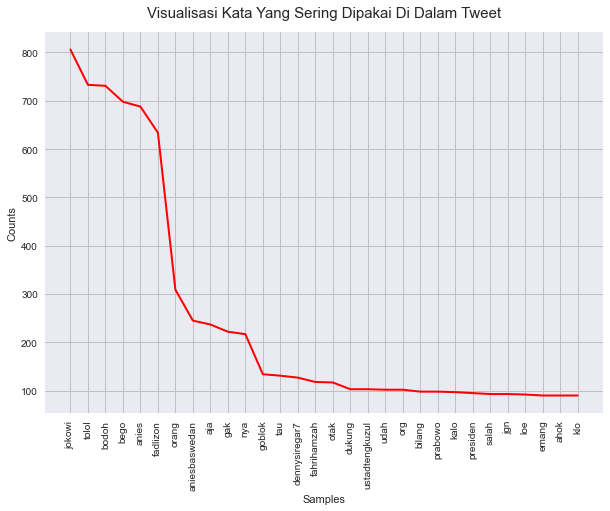

In [42]:
# Membuat visualisasi tweet berdasarkan isi tweet yang sering muncul sebanyak 30 kata yang sering digunakan
from cycler import cycler

plt.figure(figsize=(10, 7))
plt.title("Visualisasi Kata Yang Sering Dipakai Di Dalam Tweet", fontdict={"fontsize":15}, pad=15)
plt.rc("axes", prop_cycle=(cycler("color", ["r"])))
fqdist_content.plot(30, cumulative=False)
plt.show()v

## 4. Visualisasi Dengan Wordclouds

### Semua Label (Positif & Negatif)

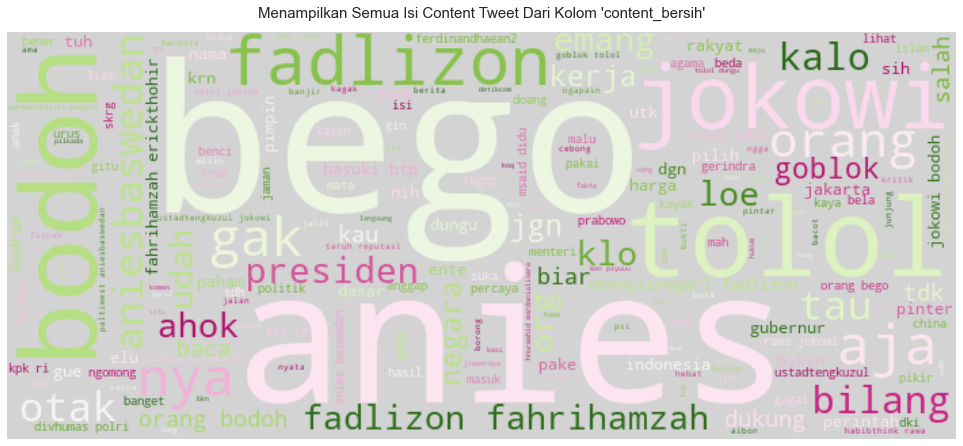

In [43]:
# Menampilkan sekaligus memvisualisasikan kata menggunakan wordcloud dari DataFrame "data_2019" dari kolom "content_bersih"  
all_tweet_post = " ".join(word for word in data_2019["content_bersih"])
wordcloud = WordCloud(colormap="PiYG", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweet_post)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Tweet Dari Kolom 'content_bersih'", fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Jika dilihat dari visualisasi diatas tampilan tersebut merupakan visualisasi dari wordcloud yang bertujuan untuk mendapatkan insight pemahaman secara utuh tentang suatu ide atau gagasan dari seseorang atau tulisan seseorang dalam suatu waktu tertentu. Visualsasi ini banyak sekali digunakan dalam pengujian analisa sentimen karena untuk melihat setiap kata-kata yang telah diketikkan oleh masyarakat.

Namun tampilan visualisasi diatas masih mencakup semua label (positif & negatif) yang membuat kita kesulitan untuk mengetahui kata-kata mana yang bernilai positif/negatif. Maka dari itu kami akan membuatnya secara terpisah antara visualisasi wordcloud yang bernilai positif dan wordcloud yang bernilai negatif.

### Label Positif

In [44]:
# Memisahkan semua data yang memiliki label positif yang disesuaikan dari kolom "label"
data_2019_label_positif = data_2019[data_2019.label == "positif"]
data_2019_label_positif.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2019-12-26 16:07:17+00:00,quvvatt amelscat firzahusain jokowi kadrun sp...,positif,"[quvvatt, amelscat, firzahusain, jokowi, kadru...","[quvvatt, amelscat, firzahusain, jokowi, kadru...","[quvvatt, amelscat, firzahusain, jokowi, kadru...",quvvatt amelscat firzahusain jokowi kadrun spe...
1,2019-12-26 13:16:30+00:00,nelkans siapa juga seudzon dari dulu gue pend...,positif,"[nelkans, siapa, juga, seudzon, dari, dulu, gu...","[nelkans, seudzon, gue, pendukung, anies, tuh,...","[nelkans, seudzon, gue, dukung, anies, tuh, lu...",nelkans seudzon gue dukung anies tuh luh knapa...
3,2019-12-26 03:08:02+00:00,firaun id aniesbaswedan opposite6890 mas piy...,positif,"[firaun, id, aniesbaswedan, opposite6890, mas,...","[firaun, id, aniesbaswedan, opposite6890, mas,...","[firaun, id, aniesbaswedan, opposite6890, mas,...",firaun id aniesbaswedan opposite6890 mas piyuu...
4,2019-12-26 03:03:46+00:00,geloraco yang sering asal ngomong dan keliata...,positif,"[geloraco, yang, sering, asal, ngomong, dan, k...","[geloraco, ngomong, keliatan, bego, anies, bas...","[geloraco, ngomong, liat, bego, anies, basweda...",geloraco ngomong liat bego anies baswedan piki...
5,2019-12-25 13:02:02+00:00,kaysah34 yusuf dumdum aniesbaswedan ustadteng...,positif,"[kaysah34, yusuf, dumdum, aniesbaswedan, ustad...","[kaysah34, yusuf, dumdum, aniesbaswedan, ustad...","[kaysah34, yusuf, dumdum, aniesbaswedan, ustad...",kaysah34 yusuf dumdum aniesbaswedan ustadtengk...


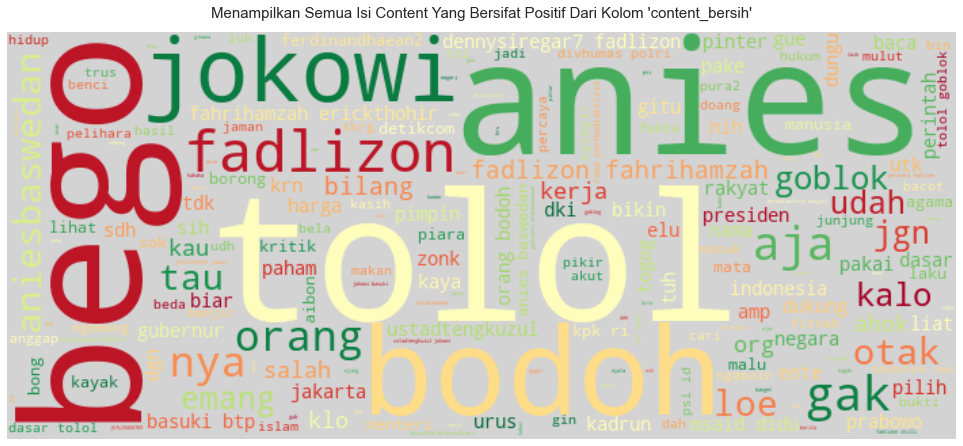

In [45]:
# Memvisualisasikan menggunakan wordcloud dari DataFrame "data_2019_label_positif" dari kolom "content_bersih"  
all_content_positive = " ".join(word for word in data_2019_label_positif["content_bersih"])
wordcloud = WordCloud(colormap="RdYlGn", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_positive)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Yang Bersifat Positif Dari Kolom 'content_bersih'", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Label Negatif

In [46]:
# Memisahkan semua data yang memiliki label negatif yang disesuaikan dari kolom "label"
data_2019_label_negatif = data_2019[data_2019.label == "negatif"]
data_2019_label_negatif.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
2,2019-12-26 10:13:08+00:00,sigitwid psi id psi instropeksi partai penjil...,negatif,"[sigitwid, psi, id, psi, instropeksi, partai, ...","[sigitwid, psi, id, psi, instropeksi, partai, ...","[sigitwid, psi, id, psi, instropeksi, partai, ...",sigitwid psi id psi instropeksi partai jilat a...
10,2019-12-24 15:31:56+00:00,lsm gracia aniesbaswedan dkijakarta anakkolon...,negatif,"[lsm, gracia, aniesbaswedan, dkijakarta, anakk...","[lsm, gracia, aniesbaswedan, dkijakarta, anakk...","[lsm, gracia, aniesbaswedan, dkijakarta, anakk...",lsm gracia aniesbaswedan dkijakarta anakkolong...
14,2019-12-23 18:36:51+00:00,muridho29 teddygusnaidi aniesbaswedan rockyge...,negatif,"[muridho29, teddygusnaidi, aniesbaswedan, rock...","[muridho29, teddygusnaidi, aniesbaswedan, rock...","[muridho29, teddygusnaidi, aniesbaswedan, rock...",muridho29 teddygusnaidi aniesbaswedan rockyger...
15,2019-12-23 16:35:35+00:00,jaqchrome kemensetnegri pdhl foto2 peresmiann...,negatif,"[jaqchrome, kemensetnegri, pdhl, foto2, peresm...","[jaqchrome, kemensetnegri, pdhl, foto2, peresm...","[jaqchrome, kemensetnegri, pdhl, foto2, resmi,...",jaqchrome kemensetnegri pdhl foto2 resmi muka ...
19,2019-12-23 10:42:15+00:00,edith kia iwanwan25081959 ernie es luwitaemil...,negatif,"[edith, kia, iwanwan25081959, ernie, es, luwit...","[edith, kia, iwanwan25081959, ernie, es, luwit...","[edith, kia, iwanwan25081959, ernie, es, luwit...",edith kia iwanwan25081959 ernie es luwitaemill...


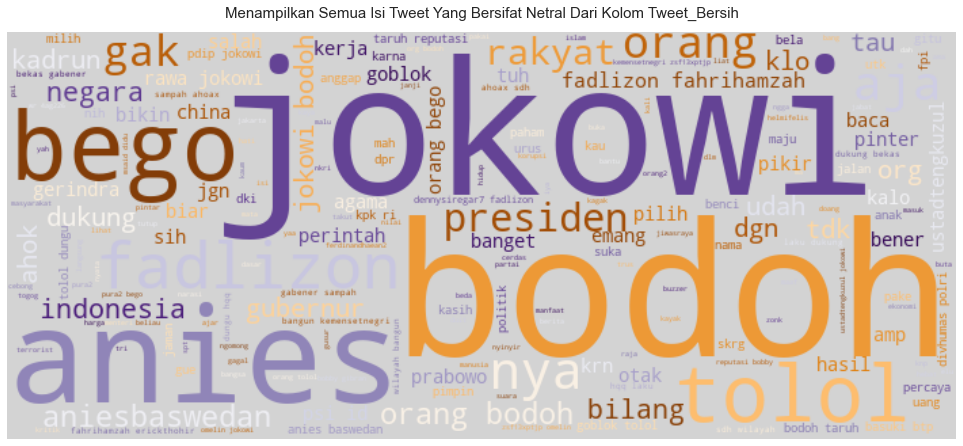

In [47]:
# Membuat Tampilan Visualisasi menggunakan wordcloud dari DataFrame "data_2019_label_negatif" dari kolom "content_bersih" 
all_content_negative = " ".join(word for word in data_2019_label_negatif["content_bersih"])
wordcloud = WordCloud(colormap="PuOr", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_negative)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Tweet Yang Bersifat Netral Dari Kolom Tweet_Bersih", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## 5. Melakukan Pemodelan Dengan Model Machine Learning

In [48]:
# Menampilkan keseluruhan data dari DataFrame "data_2019"
data_2019.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2019-12-26 16:07:17+00:00,quvvatt amelscat firzahusain jokowi kadrun sp...,positif,"[quvvatt, amelscat, firzahusain, jokowi, kadru...","[quvvatt, amelscat, firzahusain, jokowi, kadru...","[quvvatt, amelscat, firzahusain, jokowi, kadru...",quvvatt amelscat firzahusain jokowi kadrun spe...
1,2019-12-26 13:16:30+00:00,nelkans siapa juga seudzon dari dulu gue pend...,positif,"[nelkans, siapa, juga, seudzon, dari, dulu, gu...","[nelkans, seudzon, gue, pendukung, anies, tuh,...","[nelkans, seudzon, gue, dukung, anies, tuh, lu...",nelkans seudzon gue dukung anies tuh luh knapa...
2,2019-12-26 10:13:08+00:00,sigitwid psi id psi instropeksi partai penjil...,negatif,"[sigitwid, psi, id, psi, instropeksi, partai, ...","[sigitwid, psi, id, psi, instropeksi, partai, ...","[sigitwid, psi, id, psi, instropeksi, partai, ...",sigitwid psi id psi instropeksi partai jilat a...
3,2019-12-26 03:08:02+00:00,firaun id aniesbaswedan opposite6890 mas piy...,positif,"[firaun, id, aniesbaswedan, opposite6890, mas,...","[firaun, id, aniesbaswedan, opposite6890, mas,...","[firaun, id, aniesbaswedan, opposite6890, mas,...",firaun id aniesbaswedan opposite6890 mas piyuu...
4,2019-12-26 03:03:46+00:00,geloraco yang sering asal ngomong dan keliata...,positif,"[geloraco, yang, sering, asal, ngomong, dan, k...","[geloraco, ngomong, keliatan, bego, anies, bas...","[geloraco, ngomong, liat, bego, anies, basweda...",geloraco ngomong liat bego anies baswedan piki...


Karena pada pengujian kali ini data yang bersifat lebih dominan terhadap data dokumen maka kami akan menggunakan sebuah pembobotan nilai yang bernama TF-IDF (term frequency-inverse document frequency). Pembobotan dengan TF-IDF merupakan salah satu faktor pembobotan yang sering digunakan dalam konteks penambangan data yang bersifat full text. Selain itu TF-IDF juga dapat dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Teknik ini akan melakukan perhitungan dari sebuah kata kunci terhadap masing-masing dokumen.

In [49]:
# Melakukan proses pembobotan nilai dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
data_2019_tfidf = tfidf.fit_transform(data_2019["content_bersih"].astype("U"))
data_2019_tfidf

<1800x7007 sparse matrix of type '<class 'numpy.float64'>'
	with 29677 stored elements in Compressed Sparse Row format>

In [50]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_2019_tfidf, data_2019["label"], test_size=0.2, random_state=20)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split:

1. data_2019_tfidf: merupakan sebuah fungsi yang berisi nilai pembobotan dari kolom "content_bersih"
2. data_2019: merupakan sebuah fungsi untuk mendeklarasikan/memanggil kolom "label" dari masing-masing nilai sentimen
3. test_size: Nilai presentase dari sebuah ukuran untuk membagi data test. Dalam pengujian ini saya memakai nilai test_size = 0.2 yang dimana ukuran dari data test mencapai 20% dan data train mencapai 80%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya. Namun jika ditentukan nilai random_statenya maka data akan diacak (random).

Setelah melakukan proses split yaitu membagi keutuhan data menjadi 2 bagian (data test & data train) langkah selanjutnya adalah melakukan pemodelan dengan menggunakan model multinomial naive bayes atau yang biasa dikenal sebagai MultinomialNB. Multinomial naive bayes merupakan sebuah teknik turunan dari naive bayes yang menggunakan teknik yang bernama conditional probability yaitu sebuah teknik yang dapat dilakukan dengan menggunakan frekuensi kemunculan suatu kata pada suatu kelas.

In [56]:
# Pemanggilan model Multinomial Naive Bayes (MultinomialNB) beserta parameternya
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_train = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
    
}

grid_search_mnb_train = GridSearchCV(model_mnb_train, parameters, cv=30) # CV = Cross Validation

grid_search_mnb_train.fit(x_train, y_train)

GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

Penjelasan dari poin-poin yang ada di codingan diatas:
1. Parameters merupakan sebuah teknik pemanggilan fungsi-fungsi yang menjadi bagian dari sebuah model itu sendiri. Untuk mengecek parameter dari setiap model bisa dicek pada website sckit-learn. Pada codingan diatas, fungsi alpha dan fit_prior merupakan bagian dari parameter MultinomialNB. 
2. GridSearchCV merupakan sebuah teknik untuk mencari best paramater/parameter terbaik untuk kasus klasifikasi. Pada codingan diatas, teknik GridSearchCV saya gunakan untuk memanggil variabel model dari MultinomialNB (model_mnb), fungsi serta nilai dari paramater model MultinomialNB, dan fungsi cross validation yang bernilai 30.
3. Cross Validation merupakan sebuah metode yang biasa dipakai dalam pengujian data mining yang bertujuan untuk memperoleh hasil akhir yang optimal. Metode ini akan menilai dengan cara mengestimasi rotasi yang hasil statistik analisisnya akan menggeneralisasi kumpulan data yang bersifat independen.
4. .fit merupakan sebuah fungsi yang bertujuan untuk melatih model dengan data training.

Namun setelah melakukan proses pemodelan untuk data train, saya juga akan melakukan pemodelan untuk data latih (test) supaya hasil akurasi yang di dapatkan tidak mengalami overfitting.

In [60]:
"""
Karena pada langkah sebelumnya sudah melakukan pemanggilan model Multinomial Naive Bayes terhadap data train (latih) selanjutnya
adalah melakukan pemanggilan model Multinomial Naive Bayes untuk data latih
"""
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_test = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
}

grid_search_mnb_test = GridSearchCV(model_mnb_test, parameters, cv=30) # CV = Cross Validation

grid_search_mnb_test.fit(x_test, y_test) # Melatih model MultinomialNB dengan data test supaya tidak terjadi imbalanced

GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

In [61]:
# Melakukan pengujian untuk variabel test & varibael train
print("------------------------Prediksi Dari Data Uji---------------------------------")
prediction_test = grid_search_mnb_train.predict(x_test)
print(prediction_test)

print()

print("----------------------Prediksi Dari Data Latih---------------------------------")
prediction_train = grid_search_mnb_test.predict(x_train)
print(prediction_train)

------------------------Prediksi Dari Data Uji---------------------------------
['positif' 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif'
 'positif' 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'negatif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif' 'negatif'
 'negatif' 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif'
 'negatif' 'positif' 'positif' 'negatif' 'positif' 'negatif' 'negatif'
 'negatif' 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'negatif' 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'negatif' 'negatif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positi

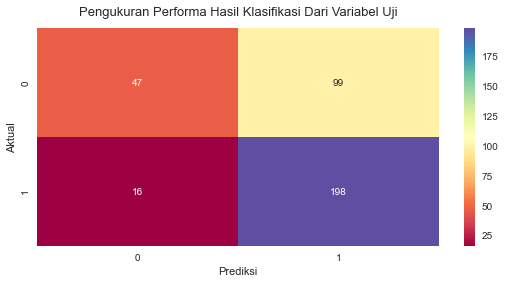

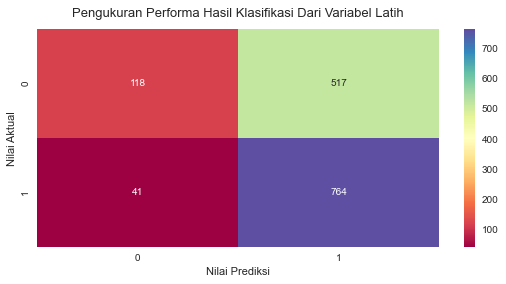

In [62]:
# Membuat visualisasi untuk menampilkan pengukuran performa dari hasil prediksi pada variabel uji & latih

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, cmap="Spectral", fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Uji", fontdict={"fontsize":13}, pad=13)
plt.show()

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_train, prediction_train), annot=True, cmap="Spectral", fmt=".0f", ax=ax)
plt.xlabel("Nilai Prediksi")
plt.ylabel("Nilai Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Latih", fontdict={"fontsize":13}, pad=13)
plt.show()

Penjelasan dari visualisasi pada confusion matrix:
- Data Test
1. True Positive pada data test memiliki nilai sejumlah 47. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data test memiliki nilai sejumlah 198. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data test memiliki nilai sejumlah 99. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data test memiliki nilai sejumlah 16. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

- Data Train
1. True Positive pada data train memiliki nilai sejumlah 118. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data train memiliki nilai sejumlah 764. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data train memiliki nilai sejumlah 517. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data train memiliki nilai sejumlah 41. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

In [63]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Multonimial Naive Bayes

print("------------------------Prediksi Dari Variabel Uji-------------------------------")
cr_test = classification_report(y_test, prediction_test)
print(cr_test)

print("------------------------Prediksi Dari Variabel Latih-------------------------------")
cr_train = classification_report(y_train, prediction_train)
print(cr_train)

------------------------Prediksi Dari Variabel Uji-------------------------------
              precision    recall  f1-score   support

     negatif       0.75      0.32      0.45       146
     positif       0.67      0.93      0.77       214

    accuracy                           0.68       360
   macro avg       0.71      0.62      0.61       360
weighted avg       0.70      0.68      0.64       360

------------------------Prediksi Dari Variabel Latih-------------------------------
              precision    recall  f1-score   support

     negatif       0.74      0.19      0.30       635
     positif       0.60      0.95      0.73       805

    accuracy                           0.61      1440
   macro avg       0.67      0.57      0.51      1440
weighted avg       0.66      0.61      0.54      1440



## 6. Membuat Prediksi Akhir & Visualisasi Tahap Akhir

In [64]:
# Membuat variabel baru yang dihasilkan dari prediksi label content sentimen terhadap data test
content_output_test = pd.DataFrame({"label": prediction_test})
content_output_test.head()

,label
0,positif
1,negatif
2,positif
3,positif
4,positif


In [65]:
# Membuat variabel yang dihasilkan dari prediksi label content sentimen terhadap data train
content_output_train = pd.DataFrame({"label": prediction_train})
content_output_train.head()

,label
0,positif
1,negatif
2,positif
3,positif
4,positif


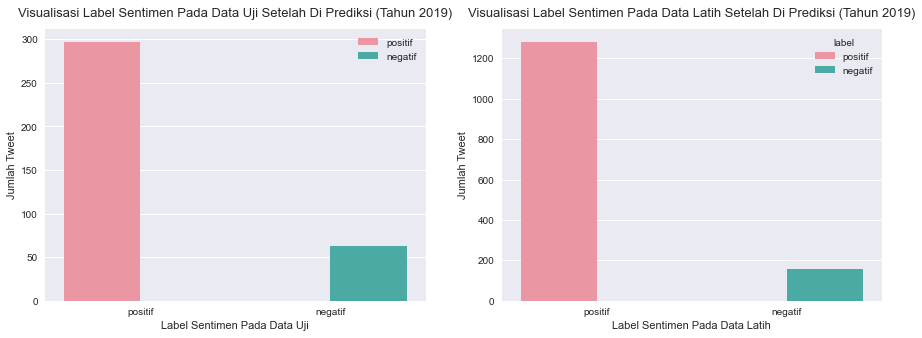

In [66]:
# Visualisasi untuk melihat sekaligus membandingkan hasil sentimen dari data test & data train
plt.figure(figsize=(15, 5))

# Visualiasi dari hasil prediksi pada variabel test/uji
plt.subplot(1, 2, 1)
sns.countplot(x="label", hue="label", data=content_output_test)
plt.title("Visualisasi Label Sentimen Pada Data Uji Setelah Di Prediksi (Tahun 2019)", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Uji")
plt.ylabel("Jumlah Tweet")
plt.legend()

# Visualiasi dari hasil prediksi pada variabel train/latih
plt.subplot(1, 2, 2)
sns.countplot(x="label", hue="label", data=content_output_train)
plt.title("Visualisasi Label Sentimen Pada Data Latih Setelah Di Prediksi (Tahun 2019)", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Latih")
plt.ylabel("Jumlah Tweet")
plt.show()